In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
train_data = pd.read_csv('tobigs14-mnist-competition/train_df.csv')
test_data = pd.read_csv('tobigs14-mnist-competition/test_df.csv')
sample_submission = pd.read_csv("tobigs14-mnist-competition/sample_submission.csv")

In [3]:
# 어떤 자료인지 보자
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = train_data.drop('label',axis = 1).values
y_train = train_data['label'].values

X_test = test_data.iloc[:,1:].values

In [5]:
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (18000, 784))

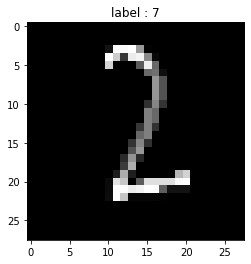

In [6]:
# 하나 출력해볼까!

index = 0
image = X_train[index].reshape(28,28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [7]:
# 전체 784 pixel, 즉, 28*28 사이즈의 그림들임!

image_size = X_train.shape[1]
print ('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print ('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))

image_size => 784
image_width => 28
image_height => 28


In [8]:
# scaling

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

print('maximum value after scaling:', X_train.max(),
      '\nminimum value after scaling:' ,X_train.min())

maximum value after scaling: 1.0 
minimum value after scaling: 0.0


In [9]:
# train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


### tensorflow keras model

##### Dropout
* overfitting을 방지하기 위한 방법 중 하나
* 각 계층에서 무작위로 선택된 뉴런의 연결을 끊으며 학습

In [10]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2), 
    # dropout 대신 keras.layers.BatchNormalization() 이용 가능
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/5
336/336 [==============================] - 6s 19ms/step - loss: 0.2110 - accuracy: 0.9390
Epoch 2/5
336/336 [==============================] - 5s 16ms/step - loss: 0.0719 - accuracy: 0.9781
Epoch 3/5
336/336 [==============================] - 8s 24ms/step - loss: 0.0466 - accuracy: 0.9855ETA: 1s
Epoch 4/5
336/336 [==============================] - 7s 22ms/step - loss: 0.0330 - accuracy: 0.9899
Epoch 5/5
263/263 [==============================] - 2s 7ms/step - loss: 0.0529 - accuracy: 0.9849


[0.05288335308432579, 0.9848809242248535]

In [14]:
#barch_size만 일단 변화시켜보았다.  -- 성능이 조금 좋아진것을 확인할 수 있다. 
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2), 
    # dropout 대신 keras.layers.BatchNormalization() 이용 가능
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=200) 
model.evaluate(X_val, y_val)

Epoch 1/5
168/168 [==============================] - 5s 29ms/step - loss: 0.2621 - accuracy: 0.9256
Epoch 2/5
168/168 [==============================] - 5s 32ms/step - loss: 0.0851 - accuracy: 0.9738
Epoch 3/5
168/168 [==============================] - 5s 29ms/step - loss: 0.0539 - accuracy: 0.9839
Epoch 4/5
168/168 [==============================] - 5s 30ms/step - loss: 0.0376 - accuracy: 0.9886
Epoch 5/5
263/263 [==============================] - 1s 5ms/step - loss: 0.0453 - accuracy: 0.9876


[0.04534053057432175, 0.9876190423965454]

##### Weight Initialization
* 기울기가 소실되는 문제를 어느정도 방지하기 위해 가중치 초기화 체계를 변경하여 모델 학습을 향상시킬 수 있다. 
* activation함수에 따라 효율적인 가중치초기화 함수를 사용

##### Weight Initialization - Xavier(Glorot)
* ReLu 등장 후에 Glorot이 2010년에 제안한 방법으로 vanshing gradient 문제를 해결하기 위해 만들어졌다고 한다
* input 과 output의 뉴런수에 기반하여 초기화의 스케일을 정함
* Normal distribution -- sqrt(2. / (in + out))
* Uniform distribution -- x = sqrt( σ / (in + out))

In [29]:
#활성화함수 relu, 가중치초기화는 glorot_normal로하여 해보았다. -- 성능이 뛰어나게 좋아지진 못했다.
model = keras.Sequential([
    keras.layers.Dense(512, input_shape = (784, ),activation = 'relu', kernel_initializer='glorot_normal'), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='glorot_normal'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='glorot_normal')                         
])
    

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=200) 
#에콕을 10개로주었을떄 8개째에서 정확도가 계속비슷하거나 떨어지는 현상이 보여서 8개로 줄여서 해보았다. 
model.evaluate(X_val, y_val)

Epoch 1/8
168/168 [==============================] - 5s 29ms/step - loss: 0.2658 - accuracy: 0.9249
Epoch 2/8
168/168 [==============================] - 5s 28ms/step - loss: 0.0862 - accuracy: 0.9741
Epoch 3/8
168/168 [==============================] - 5s 30ms/step - loss: 0.0563 - accuracy: 0.9822
Epoch 4/8
168/168 [==============================] - 5s 28ms/step - loss: 0.0395 - accuracy: 0.9875
Epoch 5/8
168/168 [==============================] - 5s 33ms/step - loss: 0.0296 - accuracy: 0.9910
Epoch 6/8
168/168 [==============================] - 4s 26ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 7/8
168/168 [==============================] - 5s 33ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 8/8
263/263 [==============================] - 2s 6ms/step - loss: 0.0446 - accuracy: 0.9871: 0s - loss: 0.0


[0.04459522292017937, 0.9871428608894348]

In [30]:
#위의 코드에서 가중치 초기화 함수를 glorot_uniform으로 바꾸어보았다. -- uniform보다는 normal이 나은것같다
model = keras.Sequential([
    keras.layers.Dense(512, input_shape = (784, ),activation = 'relu', kernel_initializer='glorot_uniform'), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='glorot_uniform'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='glorot_uniform')                         
])
    

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=200) 
 
model.evaluate(X_val, y_val)

Epoch 1/8
168/168 [==============================] - 5s 29ms/step - loss: 0.2628 - accuracy: 0.9253
Epoch 2/8
168/168 [==============================] - 5s 28ms/step - loss: 0.0844 - accuracy: 0.9744
Epoch 3/8
168/168 [==============================] - 5s 30ms/step - loss: 0.0572 - accuracy: 0.9830
Epoch 4/8
168/168 [==============================] - 5s 28ms/step - loss: 0.0417 - accuracy: 0.9869
Epoch 5/8
168/168 [==============================] - 5s 31ms/step - loss: 0.0295 - accuracy: 0.9904
Epoch 6/8
168/168 [==============================] - 5s 27ms/step - loss: 0.0233 - accuracy: 0.9924
Epoch 7/8
168/168 [==============================] - 5s 31ms/step - loss: 0.0170 - accuracy: 0.9949
Epoch 8/8
263/263 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.98 - 1s 5ms/step - loss: 0.0525 - accuracy: 0.9861


[0.05250084400177002, 0.9860714077949524]

In [32]:
#Xavier가 효율적이라는 활성화함수인 sigmoid와 tanh를 써보았는데 relu를했을떄보다 성능이 안좋았다. 
model = keras.Sequential([
    keras.layers.Dense(512, input_shape = (784, ),activation = 'tanh', kernel_initializer='glorot_normal'), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'tanh',kernel_initializer='glorot_normal'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='glorot_normal')                         
])
    

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=200) 
model.evaluate(X_val, y_val)

Epoch 1/8
168/168 [==============================] - 5s 29ms/step - loss: 0.2235 - accuracy: 0.9340 
Epoch 2/8
168/168 [==============================] - 5s 29ms/step - loss: 0.1196 - accuracy: 0.9625
Epoch 3/8
168/168 [==============================] - 5s 29ms/step - loss: 0.0967 - accuracy: 0.9698
Epoch 4/8
168/168 [==============================] - 5s 29ms/step - loss: 0.0801 - accuracy: 0.9746
Epoch 5/8
168/168 [==============================] - 6s 35ms/step - loss: 0.0679 - accuracy: 0.9781
Epoch 6/8
168/168 [==============================] - 6s 35ms/step - loss: 0.0588 - accuracy: 0.9817
Epoch 7/8
168/168 [==============================] - 10s 58ms/step - loss: 0.0519 - accuracy: 0.9830
Epoch 8/8
263/263 [==============================] - 1s 6ms/step - loss: 0.0776 - accuracy: 0.9776


[0.07761242985725403, 0.9776190519332886]

##### Weight Initialization - he
* Glorot과 유사하지만 뉴런의 output_size를 고려하진 않는다
* ReLu가 0 이하의 신호를 제거하기 때문에 분산을 유지한다는 의도

In [41]:
#활성화함수 relu, 가중치초기화는 he_normal 사용. -- 성능이 뛰어나게 좋아지진 못했다.
model = keras.Sequential([
    keras.layers.Dense(512, input_shape = (784, ),activation = 'relu', kernel_initializer='he_normal'), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_normal')                         
])
    

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=200) 
 
model.evaluate(X_val, y_val)

Epoch 1/8
168/168 [==============================] - 4s 25ms/step - loss: 0.2804 - accuracy: 0.9176
Epoch 2/8
168/168 [==============================] - 6s 34ms/step - loss: 0.0943 - accuracy: 0.9712
Epoch 3/8
168/168 [==============================] - 4s 26ms/step - loss: 0.0604 - accuracy: 0.9822
Epoch 4/8
168/168 [==============================] - 6s 33ms/step - loss: 0.0426 - accuracy: 0.9872
Epoch 5/8
168/168 [==============================] - 4s 27ms/step - loss: 0.0327 - accuracy: 0.9900
Epoch 6/8
168/168 [==============================] - 6s 33ms/step - loss: 0.0249 - accuracy: 0.9923
Epoch 7/8
168/168 [==============================] - 5s 28ms/step - loss: 0.0204 - accuracy: 0.9933
Epoch 8/8
263/263 [==============================] - 1s 4ms/step - loss: 0.0434 - accuracy: 0.9876


[0.04336514323949814, 0.9876190423965454]

In [42]:
#위의 코드에서 가중치 초기화 함수를 he_uniform으로 바꾸어보았다. 
model = keras.Sequential([
    keras.layers.Dense(512, input_shape = (784, ),activation = 'relu', kernel_initializer='he_uniform'), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_uniform')                         
])
    

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=200) 
 
model.evaluate(X_val, y_val)

Epoch 1/8
168/168 [==============================] - 5s 27ms/step - loss: 0.2729 - accuracy: 0.9205
Epoch 2/8
168/168 [==============================] - 6s 33ms/step - loss: 0.0904 - accuracy: 0.9721
Epoch 3/8
168/168 [==============================] - 4s 26ms/step - loss: 0.0598 - accuracy: 0.9812
Epoch 4/8
168/168 [==============================] - 5s 32ms/step - loss: 0.0421 - accuracy: 0.9868
Epoch 5/8
168/168 [==============================] - 5s 27ms/step - loss: 0.0309 - accuracy: 0.9907
Epoch 6/8
168/168 [==============================] - 5s 32ms/step - loss: 0.0254 - accuracy: 0.9920
Epoch 7/8
168/168 [==============================] - 5s 28ms/step - loss: 0.0199 - accuracy: 0.9939
Epoch 8/8
263/263 [==============================] - 1s 4ms/step - loss: 0.0440 - accuracy: 0.9881


[0.04399489611387253, 0.988095223903656]

##### Batch Normalization
* "internal covariance shift"문제를 방지하는 방법 중 하나이다
* 미니 배치를 만들어서 정규화시킨다
* 활성화함수가 들어가기 이전에 시행한다

In [37]:
#drop_out대신에 batchnomarlization을 사용해보았다. 
 
model = keras.Sequential([
    keras.layers.Dense(512, input_shape = (784, ),activation = 'relu', kernel_initializer='he_uniform'), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_uniform')                         
])
    

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=7, batch_size=200)  
model.evaluate(X_val, y_val)

Epoch 1/7
168/168 [==============================] - 6s 35ms/step - loss: 0.1605 - accuracy: 0.9518
Epoch 2/7
168/168 [==============================] - 4s 27ms/step - loss: 0.0343 - accuracy: 0.9901
Epoch 3/7
168/168 [==============================] - 6s 34ms/step - loss: 0.0137 - accuracy: 0.9964
Epoch 4/7
168/168 [==============================] - 5s 27ms/step - loss: 0.0088 - accuracy: 0.9976
Epoch 5/7
168/168 [==============================] - 5s 31ms/step - loss: 0.0060 - accuracy: 0.9982
Epoch 6/7
168/168 [==============================] - 5s 30ms/step - loss: 0.0033 - accuracy: 0.9992
Epoch 7/7
263/263 [==============================] - 1s 5ms/step - loss: 0.0516 - accuracy: 0.9861


[0.05164211243391037, 0.9860714077949524]

##### Optimization
* 최적의 하이퍼파라미터 값 찾기
* 가장 유명한 것 중 하나가 Adam (Adaptive Moment Estimation)이다

In [57]:
#infinity norm에 기반한 Adam의 변형인 Adamax가 궁금하여 사용해봤는데 결과가 그리 좋지 못하였다. 
model = keras.Sequential([
    keras.layers.Dense(512, input_shape = (784, ),activation = 'relu', kernel_initializer='he_uniform'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_uniform')                         
])
    

model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=200) 
 
model.evaluate(X_val, y_val)

Epoch 1/8
168/168 [==============================] - 5s 32ms/step - loss: 0.3110 - accuracy: 0.9040
Epoch 2/8
168/168 [==============================] - 6s 35ms/step - loss: 0.1339 - accuracy: 0.9597
Epoch 3/8
168/168 [==============================] - 6s 33ms/step - loss: 0.1042 - accuracy: 0.9673
Epoch 4/8
168/168 [==============================] - 6s 33ms/step - loss: 0.0787 - accuracy: 0.9764
Epoch 5/8
168/168 [==============================] - 6s 33ms/step - loss: 0.0653 - accuracy: 0.9794
Epoch 6/8
168/168 [==============================] - 6s 34ms/step - loss: 0.0536 - accuracy: 0.9831
Epoch 7/8
168/168 [==============================] - 5s 29ms/step - loss: 0.0451 - accuracy: 0.9858
Epoch 8/8
263/263 [==============================] - 2s 6ms/step - loss: 0.0528 - accuracy: 0.9851


[0.05282096192240715, 0.9851190447807312]

* RMSProp : Adagrad에서 학습률이 급격하게 감소하는 문제를 해결하기 위한 기법

In [59]:
model = keras.Sequential([
    keras.layers.Dense(512, input_shape = (784, ),activation = 'relu', kernel_initializer='he_uniform'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_uniform')                         
])
    

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=200) 
 
model.evaluate(X_val, y_val)

Epoch 1/8
168/168 [==============================] - 7s 40ms/step - loss: 0.2109 - accuracy: 0.9367
Epoch 2/8
168/168 [==============================] - 7s 39ms/step - loss: 0.0793 - accuracy: 0.9761
Epoch 3/8
168/168 [==============================] - 7s 41ms/step - loss: 0.0490 - accuracy: 0.9849
Epoch 4/8
168/168 [==============================] - 7s 39ms/step - loss: 0.0387 - accuracy: 0.9879
Epoch 5/8
168/168 [==============================] - 8s 46ms/step - loss: 0.0265 - accuracy: 0.9913
Epoch 6/8
168/168 [==============================] - 7s 39ms/step - loss: 0.0221 - accuracy: 0.9933
Epoch 7/8
168/168 [==============================] - 6s 38ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 8/8
263/263 [==============================] - 1s 5ms/step - loss: 0.0487 - accuracy: 0.9892


[0.04871207848191261, 0.9891666769981384]

* dropout과 batchnormalization은 둘중에 하나만 써야하는 건줄 알았는데 같이 쓰니까 성능이 좋게나오는것 같다! 지금까지 한것중에 가장 좋은 성능이 나왔다.
* 리더보드 제출했을때 결과가 0.98777이 나왔다.

#### 이제부터 제일 성능이 잘나온 모델을 가지고 더 높이기 위해서 batch_size나 layer등을 바꿔볼 것이다.

In [64]:
model = keras.Sequential([
    keras.layers.Dense(512, input_shape = (784, ),activation = 'relu', kernel_initializer='he_uniform'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_uniform')                         
])
    

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=512) #batch_size를 늘려보았더니 200일떄보다 성능이 떨어졌다.
 
model.evaluate(X_val, y_val)

Epoch 1/8
66/66 [==============================] - 6s 89ms/step - loss: 0.2635 - accuracy: 0.9207
Epoch 2/8
66/66 [==============================] - 5s 81ms/step - loss: 0.0883 - accuracy: 0.9723
Epoch 3/8
66/66 [==============================] - 6s 88ms/step - loss: 0.0558 - accuracy: 0.9831
Epoch 4/8
66/66 [==============================] - 6s 83ms/step - loss: 0.0397 - accuracy: 0.9879
Epoch 5/8
66/66 [==============================] - 6s 89ms/step - loss: 0.0278 - accuracy: 0.9913
Epoch 6/8
66/66 [==============================] - 6s 89ms/step - loss: 0.0234 - accuracy: 0.9926
Epoch 7/8
66/66 [==============================] - 5s 82ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 8/8
263/263 [==============================] - 1s 5ms/step - loss: 0.0521 - accuracy: 0.9862


[0.052064232528209686, 0.9861904978752136]

In [67]:
#layer수를 이것저것 변경해보아도 성능이 별로 좋아지지 않았다. #128,256,512
model = keras.Sequential([
    keras.layers.Dense(128, input_shape = (784, ),activation = 'relu', kernel_initializer='he_uniform'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_uniform')                         
])
    

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=200) #batch_size를 위처럼 늘이고 줄여보니 200일떄가 가장 좋았다. 
 
model.evaluate(X_val, y_val)

Epoch 1/8
168/168 [==============================] - 2s 13ms/step - loss: 0.3165 - accuracy: 0.9021
Epoch 2/8
168/168 [==============================] - 3s 16ms/step - loss: 0.1202 - accuracy: 0.9632 0s - l
Epoch 3/8
168/168 [==============================] - 2s 14ms/step - loss: 0.0871 - accuracy: 0.9739
Epoch 4/8
168/168 [==============================] - 2s 12ms/step - loss: 0.0681 - accuracy: 0.9788
Epoch 5/8
168/168 [==============================] - 3s 15ms/step - loss: 0.0557 - accuracy: 0.9820
Epoch 6/8
168/168 [==============================] - 3s 15ms/step - loss: 0.0464 - accuracy: 0.9849
Epoch 7/8
168/168 [==============================] - 2s 12ms/step - loss: 0.0423 - accuracy: 0.9860 0s - loss: 0.0419 
Epoch 8/8
263/263 [==============================] - 1s 4ms/step - loss: 0.0504 - accuracy: 0.9858: 0s - loss: 0.0


[0.05038708820939064, 0.9858333468437195]

In [70]:
#3-Layer로 늘려보았다. -- 비슷비슷한거같다.
model = keras.Sequential([
    keras.layers.Dense(512, input_shape = (784, ),activation = 'relu', kernel_initializer='he_uniform'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_uniform')                         
])
    

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=200) 
 
model.evaluate(X_val, y_val)

Epoch 1/8
168/168 [==============================] - 9s 56ms/step - loss: 0.2431 - accuracy: 0.9255
Epoch 2/8
168/168 [==============================] - 9s 54ms/step - loss: 0.0940 - accuracy: 0.9712
Epoch 3/8
168/168 [==============================] - 9s 54ms/step - loss: 0.0611 - accuracy: 0.9806
Epoch 4/8
168/168 [==============================] - 9s 56ms/step - loss: 0.0469 - accuracy: 0.9848
Epoch 5/8
168/168 [==============================] - 9s 56ms/step - loss: 0.0368 - accuracy: 0.9886
Epoch 6/8
168/168 [==============================] - 9s 55ms/step - loss: 0.0298 - accuracy: 0.9906
Epoch 7/8
168/168 [==============================] - 10s 57ms/step - loss: 0.0252 - accuracy: 0.9920
Epoch 8/8
263/263 [==============================] - 2s 7ms/step - loss: 0.0497 - accuracy: 0.9882


[0.04971737787127495, 0.9882143139839172]

In [73]:
#노드개수를 이런식으로 계속바꾸어봤지만 전보다 나아지진 않았다.-1 
model = keras.Sequential([
    keras.layers.Dense(128, input_shape = (784, ),activation = 'relu', kernel_initializer='he_uniform'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128,activation = 'relu',kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_uniform')                         
])
    

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=200) 
 
model.evaluate(X_val, y_val)

Epoch 1/8
168/168 [==============================] - 2s 10ms/step - loss: 0.4346 - accuracy: 0.8638
Epoch 2/8
168/168 [==============================] - 2s 12ms/step - loss: 0.1531 - accuracy: 0.9530
Epoch 3/8
168/168 [==============================] - 2s 14ms/step - loss: 0.1116 - accuracy: 0.9656
Epoch 4/8
168/168 [==============================] - 2s 11ms/step - loss: 0.0904 - accuracy: 0.9728
Epoch 5/8
168/168 [==============================] - 2s 11ms/step - loss: 0.0765 - accuracy: 0.9762
Epoch 6/8
168/168 [==============================] - 2s 12ms/step - loss: 0.0656 - accuracy: 0.9799
Epoch 7/8
168/168 [==============================] - 3s 18ms/step - loss: 0.0569 - accuracy: 0.9823 
Epoch 8/8
263/263 [==============================] - 1s 2ms/step - loss: 0.0547 - accuracy: 0.9851


[0.05470075458288193, 0.9851190447807312]

In [74]:
#노드개수를 이런식으로 계속바꾸어봤지만 전보다 나아지진 않았다.-2
model = keras.Sequential([
    keras.layers.Dense(128, input_shape = (784, ),activation = 'relu', kernel_initializer='he_uniform'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_uniform')                         
])
    

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=200) 
 
model.evaluate(X_val, y_val)

Epoch 1/8
168/168 [==============================] - 4s 21ms/step - loss: 0.3491 - accuracy: 0.8926
Epoch 2/8
168/168 [==============================] - 4s 23ms/step - loss: 0.1300 - accuracy: 0.9597
Epoch 3/8
168/168 [==============================] - 3s 19ms/step - loss: 0.0953 - accuracy: 0.9701
Epoch 4/8
168/168 [==============================] - 4s 26ms/step - loss: 0.0779 - accuracy: 0.9753
Epoch 5/8
168/168 [==============================] - 3s 20ms/step - loss: 0.0667 - accuracy: 0.9799
Epoch 6/8
168/168 [==============================] - 4s 26ms/step - loss: 0.0583 - accuracy: 0.9817
Epoch 7/8
168/168 [==============================] - 4s 23ms/step - loss: 0.0478 - accuracy: 0.9851 0s - loss:
Epoch 8/8
263/263 [==============================] - 1s 4ms/step - loss: 0.0502 - accuracy: 0.9863


[0.050212983042001724, 0.9863095283508301]

In [12]:
#3-layer가 그리좋지않은 성능을 보여서 다시 2-Layer를 사용하였다. 
#hidden layer의 가중치 초기화함수를 glorot_normal으로 바꿔보았다. -- 결과가 나쁘지않아서 캐글에 올려보았는데 0.98666이 나왔다
model = keras.Sequential([
    keras.layers.Dense(512, input_shape = (784, ),activation = 'relu', kernel_initializer='he_uniform'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='glorot_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_uniform')                         
])
    

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=200) #에폭도 10으로 했을때가 8보다 결과가 좋았다
 
model.evaluate(X_val, y_val)

Epoch 1/10
168/168 [==============================] - 8s 46ms/step - loss: 0.2031 - accuracy: 0.9405
Epoch 2/10
168/168 [==============================] - 8s 48ms/step - loss: 0.0763 - accuracy: 0.9774
Epoch 3/10
168/168 [==============================] - 8s 47ms/step - loss: 0.0495 - accuracy: 0.9844 0s -
Epoch 4/10
168/168 [==============================] - 8s 48ms/step - loss: 0.0341 - accuracy: 0.9893
Epoch 5/10
168/168 [==============================] - 9s 52ms/step - loss: 0.0259 - accuracy: 0.9921
Epoch 6/10
168/168 [==============================] - 9s 52ms/step - loss: 0.0224 - accuracy: 0.9928
Epoch 7/10
168/168 [==============================] - 7s 42ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 8/10
168/168 [==============================] - 6s 39ms/step - loss: 0.0159 - accuracy: 0.9948
Epoch 9/10
168/168 [==============================] - 7s 41ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 10/10
263/263 [==============================] - 1s 5ms/step - loss: 0.0576 - ac

[0.05760878324508667, 0.9889285564422607]

In [31]:
#활성화함수를 elu와 가중치초기화함수를 바꿔가며 시도해보았지만 별로 달라지지 않았다. 
from tensorflow.keras import optimizers
model = keras.Sequential([
    keras.layers.Dense(512, input_shape = (784, ),activation = 'elu', kernel_initializer='he_uniform'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512,activation = 'elu',kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='glorot_uniform')                         
])
    
rmsprop = optimizers.RMSprop(lr = 0.001)
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=200) 
 
model.evaluate(X_val, y_val)

Epoch 1/10
168/168 [==============================] - 8s 45ms/step - loss: 0.2224 - accuracy: 0.9341
Epoch 2/10
168/168 [==============================] - 7s 41ms/step - loss: 0.1079 - accuracy: 0.9657
Epoch 3/10
168/168 [==============================] - 6s 38ms/step - loss: 0.0789 - accuracy: 0.9754
Epoch 4/10
168/168 [==============================] - 7s 44ms/step - loss: 0.0629 - accuracy: 0.9803
Epoch 5/10
168/168 [==============================] - 7s 44ms/step - loss: 0.0503 - accuracy: 0.9847
Epoch 6/10
168/168 [==============================] - 7s 43ms/step - loss: 0.0444 - accuracy: 0.9860
Epoch 7/10
168/168 [==============================] - 7s 41ms/step - loss: 0.0372 - accuracy: 0.9879
Epoch 8/10
168/168 [==============================] - 7s 43ms/step - loss: 0.0314 - accuracy: 0.9902
Epoch 9/10
168/168 [==============================] - 8s 49ms/step - loss: 0.0286 - accuracy: 0.9912
Epoch 10/10
263/263 [==============================] - 1s 5ms/step - loss: 0.0496 - accurac

[0.04962649568915367, 0.9859523773193359]

In [35]:
predictions = model.predict_classes(X_test)

In [36]:
sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [37]:
sample_submission.to_csv("submission.csv",index=False)

* 정리해보자면 제일높게 나온모델을 기반으로 여러가지를 바꾸어가며 시도했지만 결국 더좋은모델을 찾아내지 못했다..
* 가장 놓은 성능을 보인 모델은 아래모델이며, train의 acc는 0.989, test의 acc는 0.98777이다.

model = keras.Sequential([<br>
    keras.layers.Dense(512, input_shape = (784, ),activation = 'relu', kernel_initializer='he_uniform'), <br>
    keras.layers.BatchNormalization(), <br>
    keras.layers.Dropout(0.3),<br>
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_uniform'),<br>
    keras.layers.BatchNormalization(),<br>
    keras.layers.Dropout(0.3),<br>
    keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_uniform')                         
])
    

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=200) 
 
model.evaluate(X_val, y_val)